# Project 1 TAA

## Expression Recognition with Keras

### Load datasets from file

In [21]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for neural network
import tensorflow as tf
from tensorflow import keras

In [23]:
# labelNames = ["angry", "fear", "happy", "neutral", "sad", "surprise"]
labelNames = ["happy", "sad"]

# Load Training data
mat=loadmat(f"../datasets/train/{'_'.join(labelNames)}.mat")
# mat is a dict with key "X" for x-values, and key "y" for y values
X, y = mat["X"], mat["y"]

# Load Dev Data
matDev=loadmat(f"../datasets/dev/{'_'.join(labelNames)}.mat")
X_valid, y_valid = matDev["X"], matDev["y"]

# Load Test Data
matTest=loadmat(f"../datasets/test/{'_'.join(labelNames)}.mat")
X_test, y_test = matTest["X"], matTest["y"]

In [24]:
# numbers
m = X.shape[0] # number of training examples
labels = np.max(y)+1 # number of labels
features = X.shape[1:] # number of features per example

print(f"Loaded {m} traing examples with {labels} labels, each with {features} features (pixels).")
print("Labels are:", ', '.join(labelNames))

print(f"Loaded {X_valid.shape[0]} dev examples.")
print(f"Loaded {X_test.shape[0]} test examples.")

Loaded 2000 traing examples with 2 labels, each with (2304,) features (pixels).
Labels are: happy, sad
Loaded 400 dev examples.
Loaded 400 test examples.


### Some examples

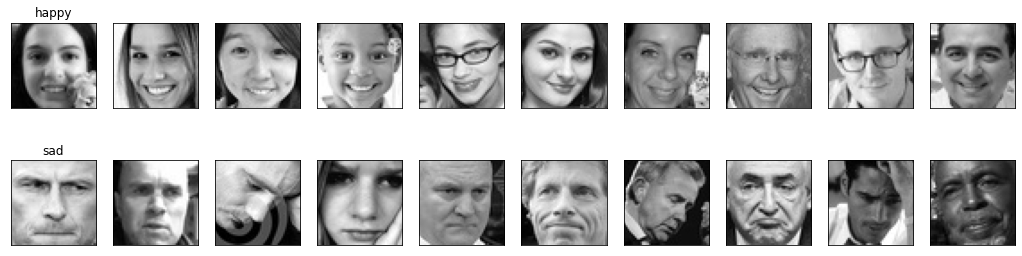

In [25]:
examplesNumber = 10
fig, axis = plt.subplots(labels,examplesNumber,figsize=(18,2*labels))
fig.subplots_adjust(top=1)

# Foreach label, output 10 random images
for i in range(labels):
    for j in range(examplesNumber):
        # Show image
        axis[i,j].imshow(X[np.random.randint((m/labels)*(i),(m/labels)*(i+1)+1),:].reshape(48,48,order="F").T, cmap="gray") 
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title only on first
        if j==0:
            axis[i,j].set_title(labelNames[i])

### The neural network

Based on https://medium.com/nerd-for-tech/how-to-train-neural-networks-for-image-classification-part-1-21327fe1cc1

In [27]:
# Important variables
iterations = 200
hiddenLayers = [20]
hyperParameter = 0.1
alpha = 0.01

#### Build the network

In [28]:
# Create model
modelSeq = []
# Flattens each image (48x48) to 1x2304
modelSeq.append(keras.layers.Flatten(input_shape = [features[0]]))
# Hidden layers with relu activation function
for h in hiddenLayers:
    modelSeq.append(keras.layers.Dense(
        h, 
        activation = "relu", 
        bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
    ))
# Output layer with softmax activation function
modelSeq.append(keras.layers.Dense(
    labels, 
    activation = "softmax",
    bias_regularizer= keras.regularizers.l2(hyperParameter) if hyperParameter else None
))

model = keras.models.Sequential(modelSeq)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                46100     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 42        
Total params: 46,142
Trainable params: 46,142
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile model
gradient = keras.optimizers.SGD(learning_rate=alpha)
model.compile(
    # Using sparse categorical crossentropy loss function
    loss = "sparse_categorical_crossentropy",
    # Using stochastic gradient descent as gradient descent
    optimizer = gradient,
    # In addition to cost, we want accuracy to help understanding how the model is working 
    metrics = ["accuracy"]
)

#### Train the network

In [30]:
history = model.fit(
    X,
    y,
    epochs = iterations,
    batch_size = 128,
    validation_data = (X_valid, y_valid)
)

Epoch 1/200
16/16 [==============================] - 0s 9ms/step - loss: 0.6974 - accuracy: 0.5203 - val_loss: 0.6931 - val_accuracy: 0.5600
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5321 - val_loss: 0.6850 - val_accuracy: 0.5675
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5382 - val_loss: 0.6786 - val_accuracy: 0.5825
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5790 - val_loss: 0.6915 - val_accuracy: 0.5375
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.5851 - val_loss: 0.6682 - val_accuracy: 0.6150
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6699 - accuracy: 0.5964 - val_loss: 0.6764 - val_accuracy: 0.5400
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6668 - accuracy: 0.6057 - val_loss: 0.6692 - val_accuracy: 0.5825
Epoch 8/200
1

Epoch 59/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7084 - val_loss: 0.5933 - val_accuracy: 0.6775
Epoch 60/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7249 - val_loss: 0.5907 - val_accuracy: 0.6725
Epoch 61/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.6944 - val_loss: 0.5933 - val_accuracy: 0.6775
Epoch 62/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7321 - val_loss: 0.6172 - val_accuracy: 0.6300
Epoch 63/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7249 - val_loss: 0.6095 - val_accuracy: 0.6375
Epoch 64/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.6755 - val_loss: 0.6116 - val_accuracy: 0.6900
Epoch 65/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7256 - val_loss: 0.6683 - val_accuracy: 0.6475
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 0.5681 - accuracy: 0.7041 - val_loss: 0.5853 - val_accuracy: 0.7100
Epoch 117/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.7358 - val_loss: 0.5777 - val_accuracy: 0.7050
Epoch 118/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5293 - accuracy: 0.7492 - val_loss: 0.6078 - val_accuracy: 0.7025
Epoch 119/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.7611 - val_loss: 0.5743 - val_accuracy: 0.6850
Epoch 120/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5182 - accuracy: 0.7459 - val_loss: 0.6031 - val_accuracy: 0.6500
Epoch 121/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5459 - accuracy: 0.7273 - val_loss: 0.5795 - val_accuracy: 0.6850
Epoch 122/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5113 - accuracy: 0.7578 - val_loss: 0.5790 - val_accuracy: 0.7075
Epoch 123/200

16/16 [==============================] - 0s 10ms/step - loss: 0.4928 - accuracy: 0.7626 - val_loss: 0.5748 - val_accuracy: 0.6950
Epoch 174/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4711 - accuracy: 0.7813 - val_loss: 0.5665 - val_accuracy: 0.7025
Epoch 175/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7530 - val_loss: 0.6082 - val_accuracy: 0.7025
Epoch 176/200
16/16 [==============================] - 0s 8ms/step - loss: 0.4826 - accuracy: 0.7795 - val_loss: 0.5921 - val_accuracy: 0.6800
Epoch 177/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5154 - accuracy: 0.7466 - val_loss: 0.6285 - val_accuracy: 0.6325
Epoch 178/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7600 - val_loss: 0.6288 - val_accuracy: 0.6375
Epoch 179/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5128 - accuracy: 0.7442 - val_loss: 0.7093 - val_accuracy: 0.5775
Epoch 180/20

#### Evaluate the performance with test set

In [31]:
model.evaluate(X_test, y_test, return_dict=True)

13/13 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.7300


{'loss': 0.5667256116867065, 'accuracy': 0.7300000190734863}

### Analysys

#### Training metrics

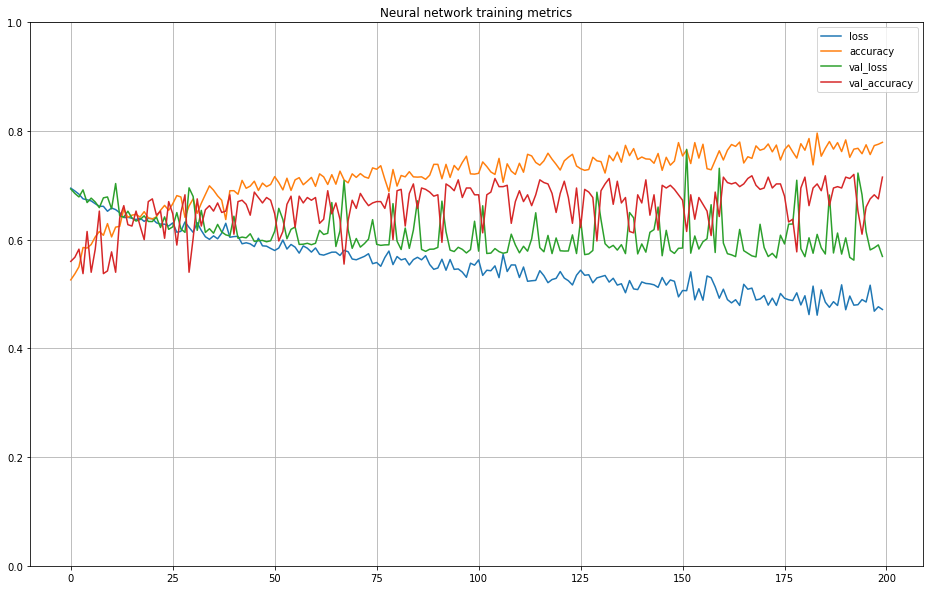

In [32]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Neural network training metrics")
plt.show()

> If the loss does not look like it has reached a minimum (being stable on the end), it suggests we can train the network further.

> It is normal that the accuracy for the training set is higher than for the validation set, but they might be close. If not, there is overfitting!

#### Confusion matrix

In [33]:
def confusionMatrix(labels, pred, y):
    
    confusionTFPN = {}
    confusionLabels = {}
    
    # Foreach emotion
    for ie in range(len(labels)):
        # TRUE AND FALSE POSITIVES AND NEGATIVES (TFPN)
        
        # Get indexes where emotion was predicted
        ieIndexesPred = [i for i in range(pred.size) if pred[i]==ie]
        ieIndexesNotPred = [i for i in range(pred.size) if pred[i]!=ie]

        # Predicted, and Actual
        TP = sum(pred[:,np.newaxis][ieIndexesPred]==y[ieIndexesPred])
        # Predicted, but not actual
        FP = sum(pred[:,np.newaxis][ieIndexesPred]!=y[ieIndexesPred])
        # Not predicted, but actual
        FN = sum(y[ieIndexesNotPred]==ie)
        # Not predicted and not actual
        TN = sum(y[ieIndexesNotPred]!=ie)

        TP = TP[0] if TP else 0
        FP = FP[0] if FP else 0
        FN = FN[0] if FN else 0
        TN = TN[0] if TN else 0
        
        confusionTFPN[labels[ie]] = {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN
        }
        
        # CONFUSION WITH OTHER labels (Confusion)
        # For emotion e
        # Count the number of predictions made for all classes
        # Foreach emotion, check how many times it has been predicted 
        
        # Get indexes where emotion is real
        ieIndexesY = [i for i in range(y.size) if y[i]==ie]
        
        # Foreach matching prediction, check what emotion was predicted
        confusionLabels[labels[ie]] = {
            e: sum(pred[:,np.newaxis][ieIndexesY]==labels.index(e))[0] for e in labels
        }
        
    return confusionTFPN, confusionLabels

In [34]:
def outputConfusionTables(labels, testExamplesNumber, confusionTFPN, confusionLabels, axs, axsLine, axsTitle):
     # TABLES
    rows = tuple(labels)
    
    # TABLES / TFPN
    # Output confusion matrix as plot table
    data = [
        [
            f"{vals['TP']} ({vals['TP']/testExamplesNumber*100:.2f}%)",
            f"{vals['TN']} ({vals['TN']/testExamplesNumber*100:.2f}%)",
            f"{vals['TP']+vals['TN']} ({(vals['TP']+vals['TN'])/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']} ({vals['FP']/testExamplesNumber*100:.2f}%)",
            f"{vals['FN']} ({vals['FN']/testExamplesNumber*100:.2f}%)",
            f"{vals['FP']+vals['FN']} ({(vals['FP']+vals['FN'])/testExamplesNumber*100:.2f}%)",
            vals['FP']+vals['FN']+vals['TP']+vals['TN']
        ]
        for _, vals in confusionTFPN.items()
    ]
    columns = ['TP (%)', 'TN (%)', 'T (%)', 'FP (%)', 'FN (%)', 'F (%)', f"Total"]
    
    # Colorize cells depending on value 
    cellColoursTF=plt.cm.Blues([
        [ (vals['TP']+vals['TN'])/testExamplesNumber, (vals['FP']+vals['FN'])/testExamplesNumber ] for _, vals in confusionTFPN.items()
    ])
    cellColourPos=plt.cm.Greens([
        [ vals['TP']/(vals['TP']+vals['FP']), vals['FP']/(vals['TP']+vals['FP']) ] for _, vals in confusionTFPN.items()
    ])
    cellColourNeg=plt.cm.Reds([
        [ vals['TN']/(vals['TN']+vals['FN']), vals['FN']/(vals['TN']+vals['FN']) ] for _, vals in confusionTFPN.items()
    ])
    
    cellColours = [
        [
            cellColourPos[i][0],
            cellColourNeg[i][0],
            cellColoursTF[i][0],
            cellColourPos[i][1],
            cellColourNeg[i][1],
            cellColoursTF[i][1],
            [0, 0, 0, 0]
        ]
        for i in range(len(rows))
    ]
    
    the_table = axs[axsLine].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    # the_table.scale(1.2, 1)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(20)
    axs[axsLine].axis('off')
    axs[axsLine].axis('tight')
    axs[axsLine].set_title(f"Confusion matrix {axsTitle}", fontsize=20, pad=0)    
    
    # TABLES / Confusion    
    # Output confusion matrix as plot table
    data = [[o for _,o in others.items()] for _,others in confusionLabels.items()]
    columns = rows
    
    # Colorize cells depending on value
    vals = [o for _,others in confusionLabels.items() for _,o in others.items()]
    normal = plt.Normalize(min(vals)-1, max(vals)+1)
    cellColours=plt.cm.Blues(normal(data))
        
    the_table = axs[axsLine+1].table(
      cellText=data,
      rowLabels=rows,
      colLabels=columns,
      loc='center',
      cellColours=cellColours
    )
    
    the_table.set_fontsize(20)
    # the_table.scale(1, 4)
    axs[axsLine+1].axis('off')
    axs[axsLine+1].axis('tight')
    axs[axsLine+1].set_title(f"True/Predicted {axsTitle}", fontsize=20)
    

In [35]:
# Get y predicted for test data set
predict = model.predict(X_test)
y_pred = np.array([np.argmax(p) for p in predict])

# Compute confusions
confusionTFPN, confusionLabels = confusionMatrix(labelNames, y_pred, y_test)

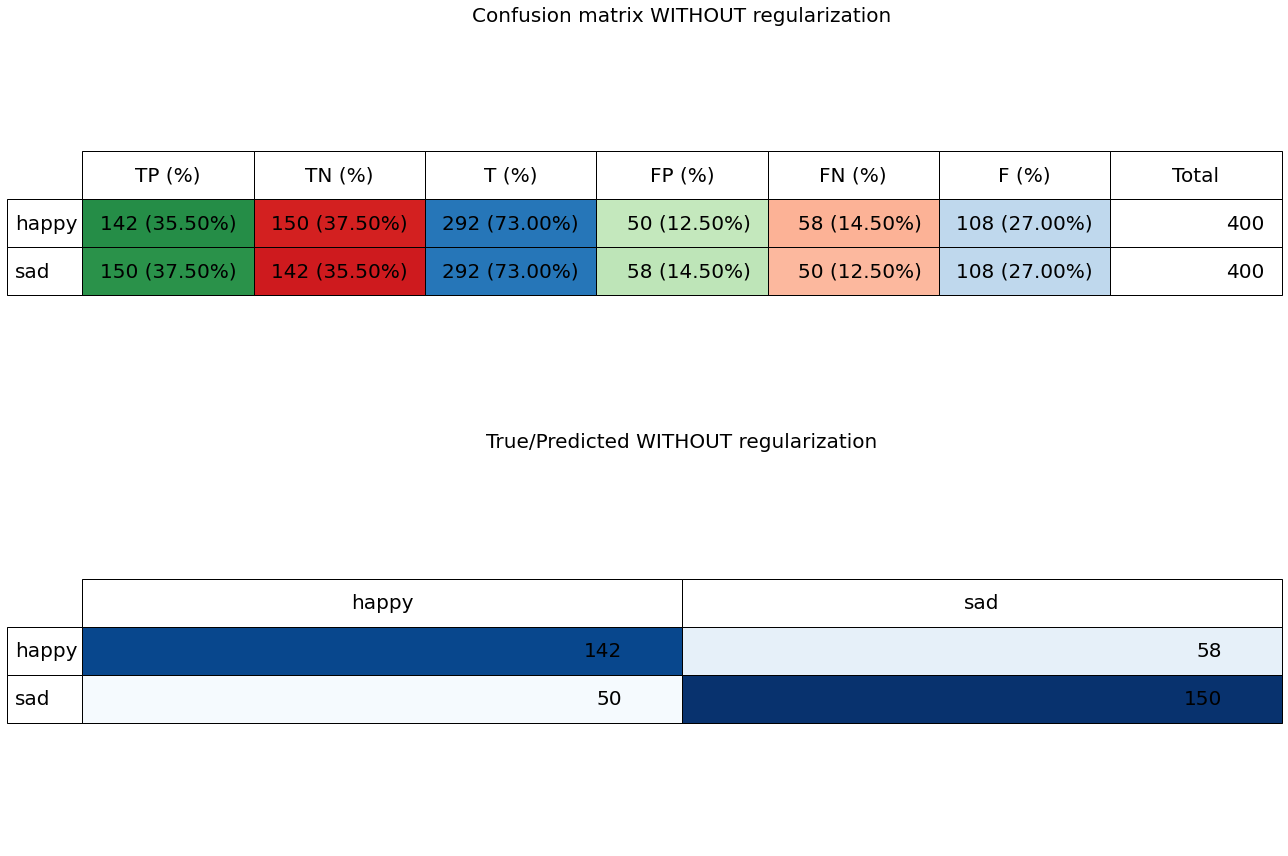

In [36]:
# Display as table
fig, axs = plt.subplots(2,1)

outputConfusionTables(labelNames, y_test.size, confusionTFPN, confusionLabels, axs, 0, "WITHOUT regularization")


fig.set_size_inches(18,6*len(labelNames))
fig.subplots_adjust(left=0.2, top=20)
fig.tight_layout()

### Our images classification

Got 8 right predictions out of 18.


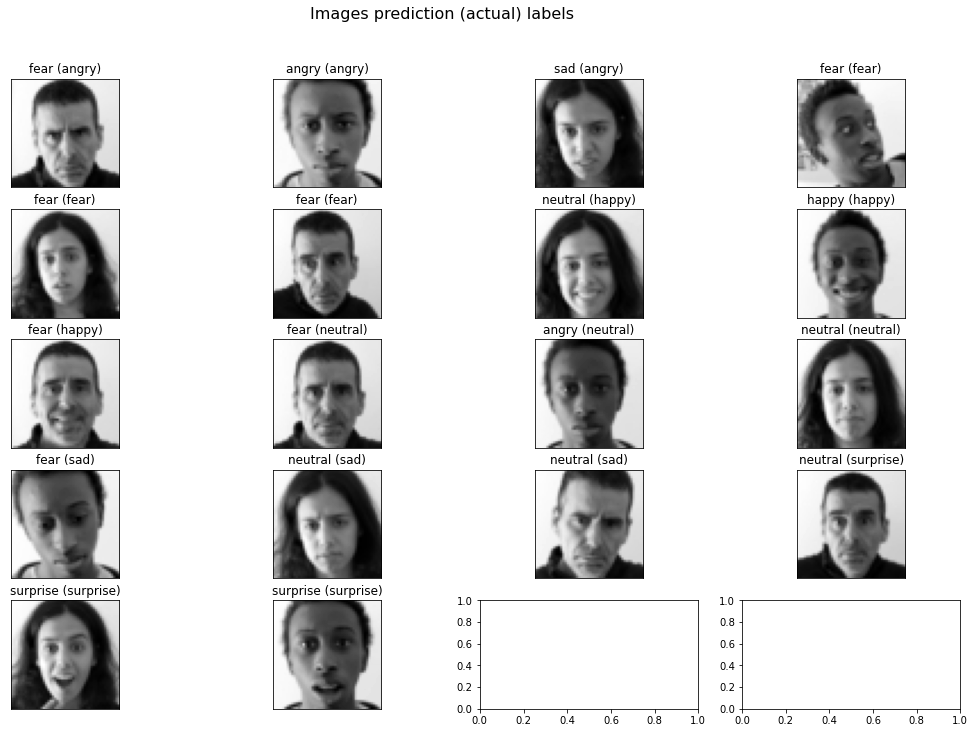

In [19]:
import math

imagesPerLine = 4
lines = math.ceil(len(y_test)/imagesPerLine)

fig, axis = plt.subplots(lines,imagesPerLine,figsize=(18,2*lines))
fig.subplots_adjust(top=1)

right = 0
for i in range(lines):
    for j in range(imagesPerLine):
        index = i*imagesPerLine + j
        
        if X_test.shape[0]<=index:
            break
        
        # Show image
        axis[i,j].imshow(X_test[index,:].reshape(48,48,order="F").T, cmap="gray") 
        
        # Hide axes
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])
        # Display title with predicted (actual)
        axis[i,j].set_title(f"{labelNames[y_pred[index]]} ({labelNames[y_test[index][0]]})")
        
        right += y_pred[index]==y_test[index][0]
        
fig.suptitle('Images prediction (actual) labels', fontsize=16, y=1.1) 

plt.savefig(f"../datasets/images/home_made/predictions.png")

print(f"Got {right} right predictions out of {len(y_pred)}.")